In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
currency=pd.read_parquet('historical_currency_exchange.parquet')
df=pd.read_parquet('transaction_fraud_data.parquet')

In [3]:
df

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,...,False,Safari,web,2e37bb086e754bfaf2ec3806dcac8d98,248.8.111.152,False,False,False,"{'num_transactions': 1, 'total_amount': 1521.7...",False
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,...,False,Chrome,web,459c67dbfbb15019df8088fc0f2ffe1d,224.123.137.90,False,False,False,"{'num_transactions': 0, 'total_amount': 356.06...",False
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,...,False,Safari,web,337d36a8f5e811564a1dd3c255db01dd,31.196.9.234,False,False,False,"{'num_transactions': 0, 'total_amount': 391.96...",False
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,...,False,Firefox,web,52874c17f4ab0846fac1aed0c66e8551,188.74.107.8,False,False,False,"{'num_transactions': 2, 'total_amount': 1474.5...",False


In [4]:
df.isna().sum()

transaction_id             0
customer_id                0
card_number                0
timestamp                  0
vendor_category            0
vendor_type                0
vendor                     0
amount                     0
currency                   0
country                    0
city                       0
city_size                  0
card_type                  0
is_card_present            0
device                     0
channel                    0
device_fingerprint         0
ip_address                 0
is_outside_home_country    0
is_high_risk_vendor        0
is_weekend                 0
last_hour_activity         0
is_fraud                   0
dtype: int64

In [9]:
df.describe()

,card_number,timestamp,amount
count,7.483766e+06,7483766,7.483766e+06
mean,4.222100e+15,2024-10-15 12:36:38.052469,4.792468e+04
min,3.700086e+14,2024-09-30 00:00:01.034820,1.000000e-02
25%,4.004400e+15,2024-10-07 18:08:27.325326,3.635300e+02
50%,5.010745e+15,2024-10-15 12:46:31.739295,1.177450e+03
75%,5.999914e+15,2024-10-23 07:37:00.969509,2.242953e+04
max,6.999728e+15,2024-10-30 23:59:59.101885,6.253153e+06
std,2.341170e+15,NaN,1.775562e+05


In [8]:
last_hour_df = df['last_hour_activity'].apply(pd.Series)

last_hour_df.columns = [f'lha_{c}' for c in last_hour_df.columns]

df_new = pd.concat([df.drop(columns=['last_hour_activity']), last_hour_df], axis=1)

df_new.nunique()

transaction_id             7477306
customer_id                   4869
card_number                   5000
timestamp                  7483754
vendor_category                  8
vendor_type                     17
vendor                         105
amount                     2831167
currency                        11
country                         12
city                            11
city_size                        2
card_type                        5
is_card_present                  2
device                           9
channel                          3
device_fingerprint          785462
ip_address                 7477187
is_outside_home_country          2
is_high_risk_vendor              2
is_weekend                       2
is_fraud                         2
lha_num_transactions          3538
lha_total_amount           7483717
lha_unique_merchants           106
lha_unique_countries            13
lha_max_single_amount       150632
dtype: int64

In [30]:
df=df_new.copy()

In [10]:
df_new.duplicated().sum()

np.int64(0)

In [25]:
print("Процент мошеннических транзакций:",len(df[df['is_fraud']==True])/len(df)*100,"%")

Процент мошеннических транзакций: 19.972818498066346 %


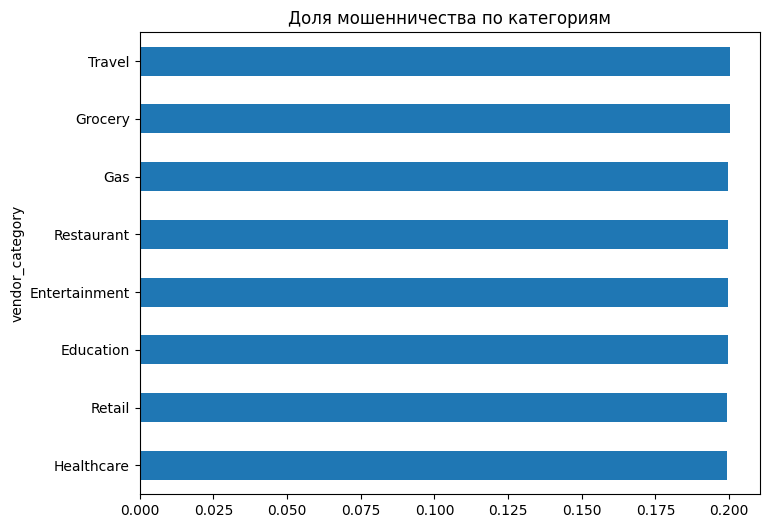

In [15]:
fraud_rate = df_new.groupby('vendor_category')['is_fraud'].mean().sort_values()
fraud_rate.plot(kind='barh', figsize=(8,6), title='Доля мошенничества по категориям')
plt.show()

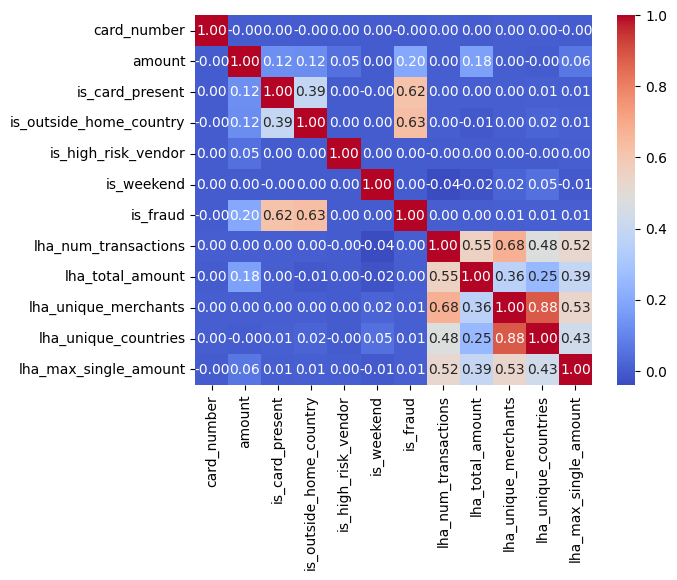

In [16]:
sns.heatmap(df_new.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [17]:
#Гипотеза: Мошенничество полностью связано с физическим присутствием карты
pd.crosstab(df['is_card_present'], df['is_fraud'], normalize='index')
#В этих данных физическое присутствие карты полностью ассоциировано с мошенничеством.
# Признак is_card_present можно использовать как сильный индикатор для модели обнаружения мошенничества 
#— он почти полностью определяет целевую переменную.

is_fraud,False,True
is_card_present,,
False,0.876525,0.123475
True,0.000000,1.000000


Гипотеза: Мошенничество чаще происходит, когда транзакция проводится вне страны проживания клиента.

In [21]:
pd.crosstab(df['is_outside_home_country'], df['is_fraud'], normalize='index')
#внутри своей страны человек маловероятно совершит мошенническое действие

is_fraud,False,True
is_outside_home_country,,
False,0.975098,0.024902
True,0.432247,0.567753


Можно внедрить правило или предупреждение для транзакций за границей — например, дополнительная проверка, SMS-подтверждение или лимит на сумму, если клиент делает оплату за пределами своей страны.

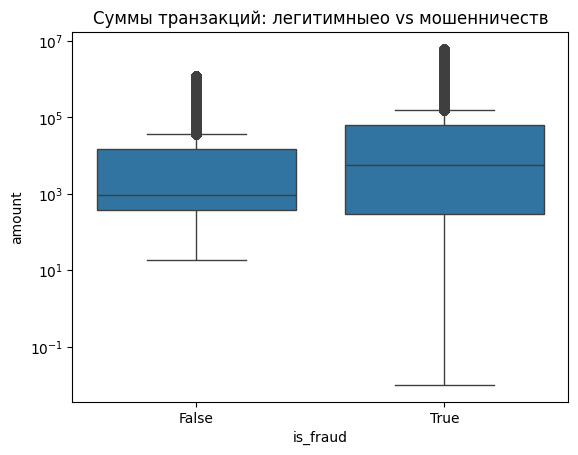

In [29]:
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.yscale('log')
plt.title('Суммы транзакций: легитимныео vs мошенничеств')
plt.show()

In [40]:
print(df[df['amount'] < 1]['is_fraud'].value_counts(normalize=True))
print(df[df['amount'] > 10000]['is_fraud'].value_counts(normalize=True))

is_fraud
True    1.0
Name: proportion, dtype: float64
is_fraud
False    0.634621
True     0.365379
Name: proportion, dtype: float64


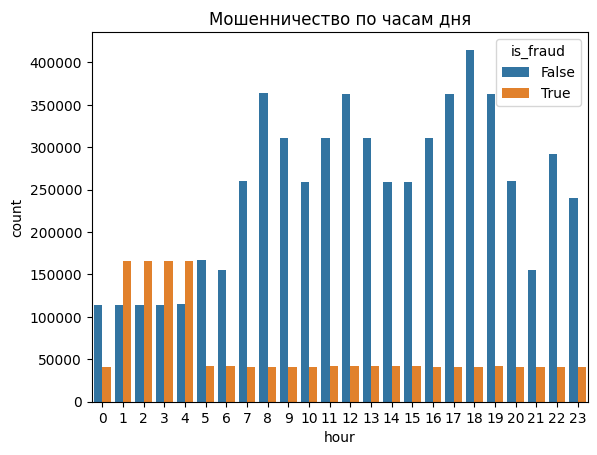

In [31]:
df['hour'] = df['timestamp'].dt.hour
sns.countplot(x='hour', hue='is_fraud', data=df)
plt.title('Мошенничество по часам дня')
plt.show()
#В ночные часы (1–4) мошенничество чаще, чем легитимные транзакции.

Можно усилить мониторинг ночных транзакций — например, повышенные лимиты проверки или уведомления клиенту, если транзакция совершается ночью.

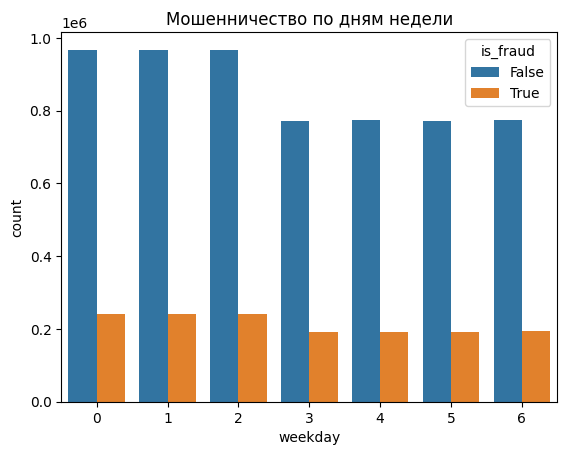

In [34]:
df['weekday'] = df['timestamp'].dt.dayofweek  
sns.countplot(x='weekday', hue='is_fraud', data=df)
plt.title('Мошенничество по дням недели')
plt.show()

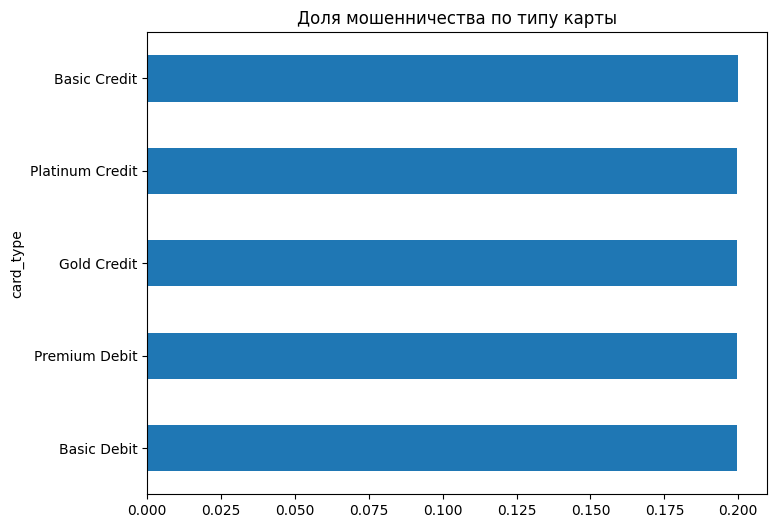

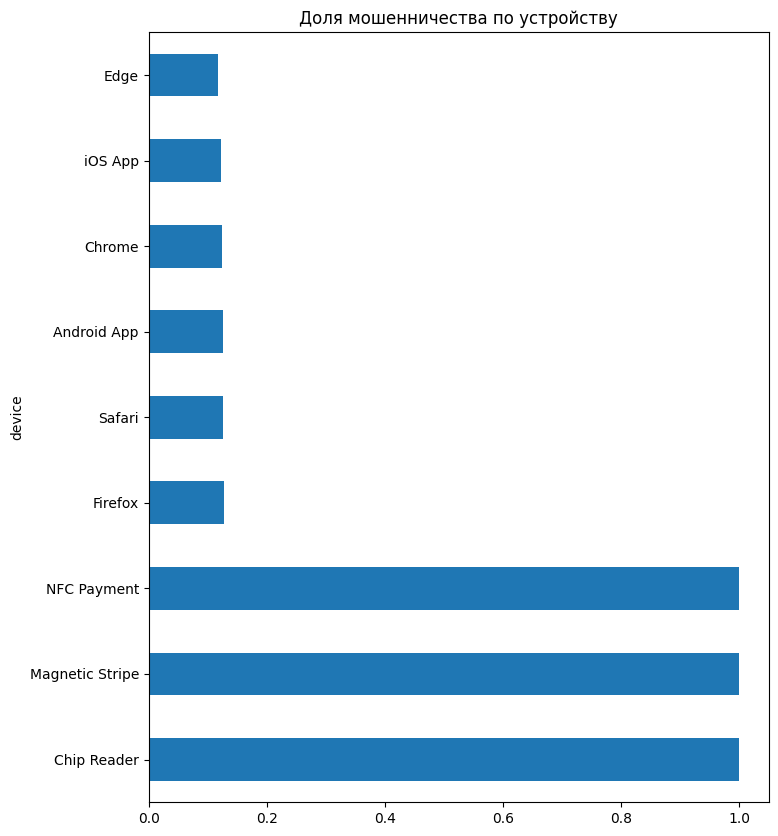

In [35]:
card_fraud = df.groupby('card_type')['is_fraud'].mean().sort_values()
card_fraud.plot(kind='barh', figsize=(8,6), title='Доля мошенничества по типу карты')
plt.show()

device_fraud = df.groupby('device')['is_fraud'].mean().sort_values(ascending=False)
device_fraud.plot(kind='barh', figsize=(8,10), title='Доля мошенничества по устройству')
plt.show()

Для устройств Chip Reader, Magnetic Stripe и NFC Payment доля мошенничества 100%. Для остальных устройств доля низкая и примерно равномерная.
ценность:
device может быть бинарным или категориальным признаком для модели выявления мошенничества. Модель легко распознаёт эти устройства как высокорискованные.

In [43]:
df['device'].value_counts()

device
Edge               1189560
iOS App            1143461
Chrome             1132384
Android App        1126117
Firefox            1120952
Safari             1120245
Chip Reader         217324
Magnetic Stripe     217204
NFC Payment         216519
Name: count, dtype: int64

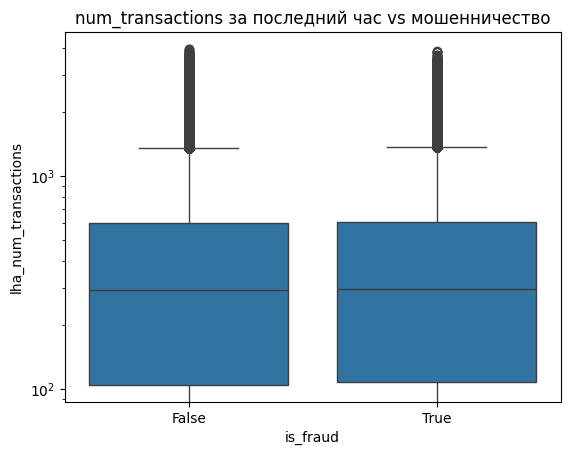

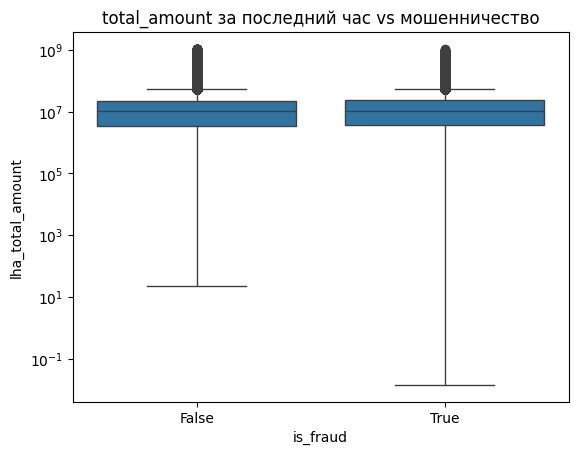

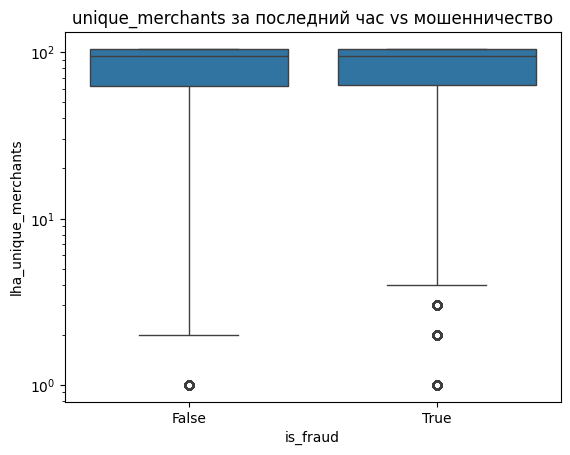

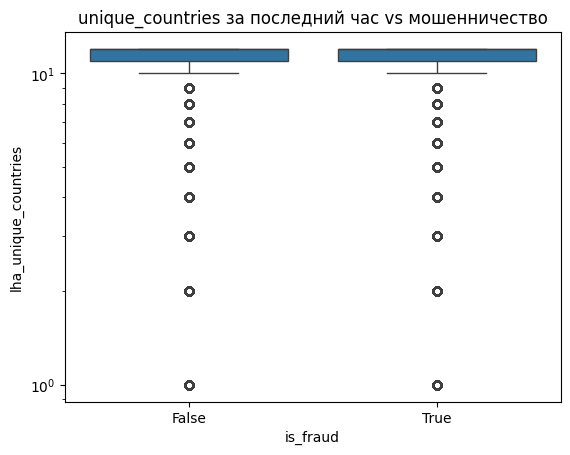

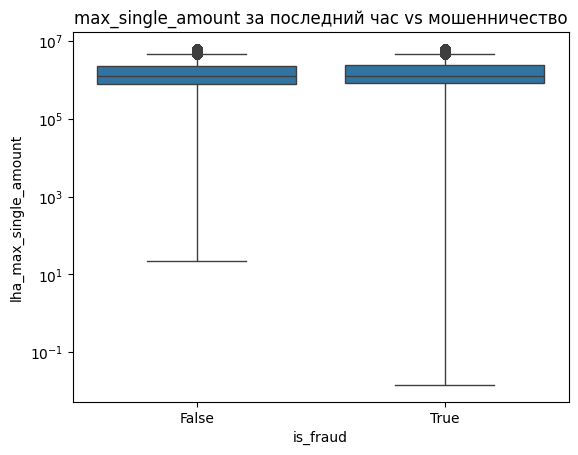

In [42]:
lha_cols = ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']
for col in lha_cols:
    sns.boxplot(x='is_fraud', y=f'lha_{col}', data=df)
    plt.yscale('log')
    plt.title(f'{col} за последний час vs мошенничество')
    plt.show()

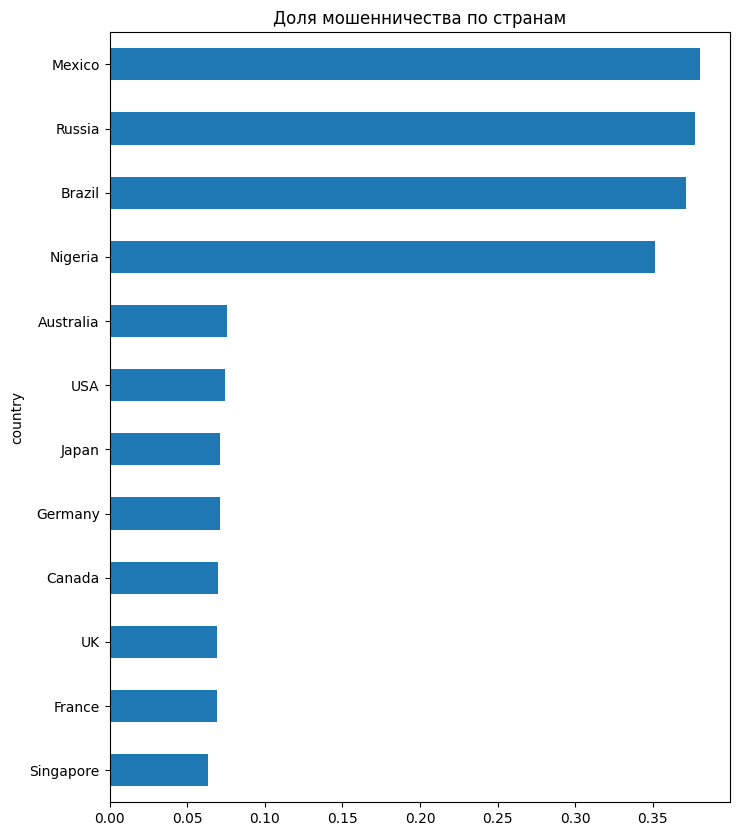

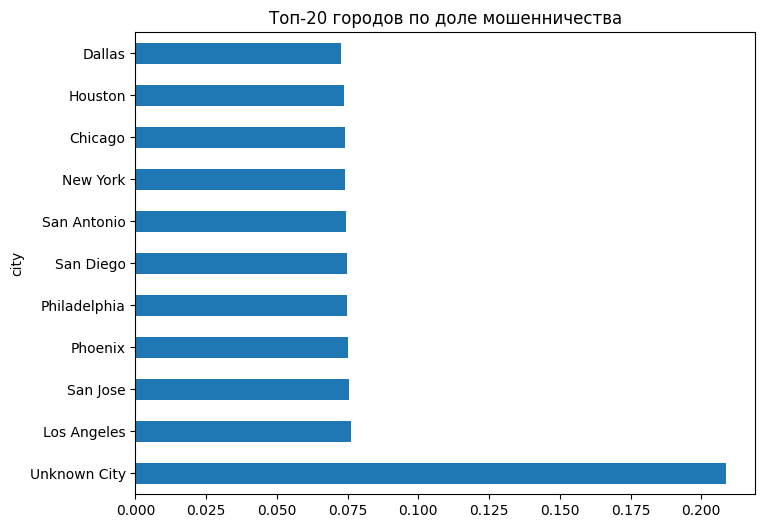

In [38]:
country_fraud = df.groupby('country')['is_fraud'].mean().sort_values()
country_fraud.plot(kind='barh', figsize=(8,10), title='Доля мошенничества по странам')
plt.show()

city_fraud = df.groupby('city')['is_fraud'].mean().sort_values(ascending=False).head(20)
city_fraud.plot(kind='barh', figsize=(8,6), title='Топ-20 городов по доле мошенничества')
plt.show()

In [69]:
pd.crosstab(df['channel'], df['is_fraud'], normalize='index')

is_fraud,False,True
channel,,
mobile,0.876122,0.123878
pos,0.000000,1.000000
web,0.876725,0.123275


In [70]:
df['channel'].value_counts()

channel
web       4563141
mobile    2269578
pos        651047
Name: count, dtype: int64

In [68]:
cols_to_check = [ 'channel', 'is_outside_home_country', 'vendor_category', 'vendor_type']

for col in cols_to_check:
    combo = df.groupby(['country', col])['is_fraud'].mean().sort_values(ascending=False)
    print(f"\n=== Country + {col} ===")
    print(combo[combo > 0.5].head(10))  



=== Country + channel ===
country    channel
UK         pos        1.0
France     pos        1.0
Mexico     pos        1.0
Australia  pos        1.0
Japan      pos        1.0
Russia     pos        1.0
Germany    pos        1.0
Singapore  pos        1.0
Nigeria    pos        1.0
Canada     pos        1.0
Name: is_fraud, dtype: float64

=== Country + is_outside_home_country ===
country  is_outside_home_country
Brazil   True                       0.759731
Mexico   True                       0.759340
Russia   True                       0.759260
Nigeria  True                       0.758092
Name: is_fraud, dtype: float64

=== Country + vendor_category ===
Series([], Name: is_fraud, dtype: float64)

=== Country + vendor_type ===
Series([], Name: is_fraud, dtype: float64)


Ценность для бизнеса: если транзакция идёт из этих стран и пользователь не из этой страны, риск очень высокий → можно требовать доп. верификацию (2FA, звонок клиенту).

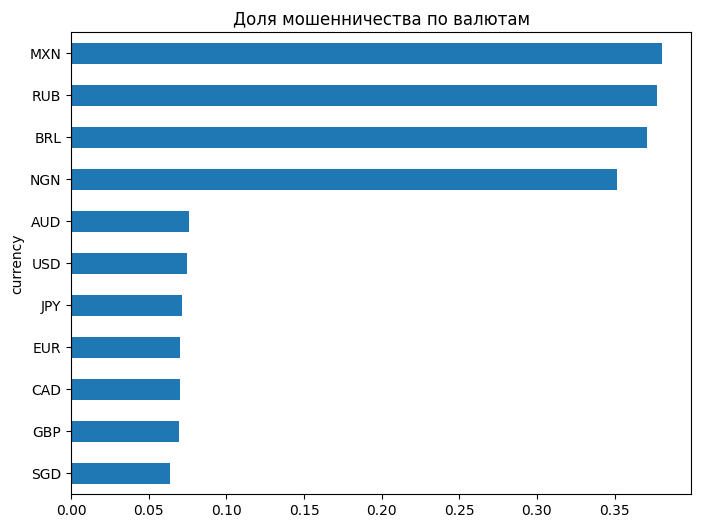

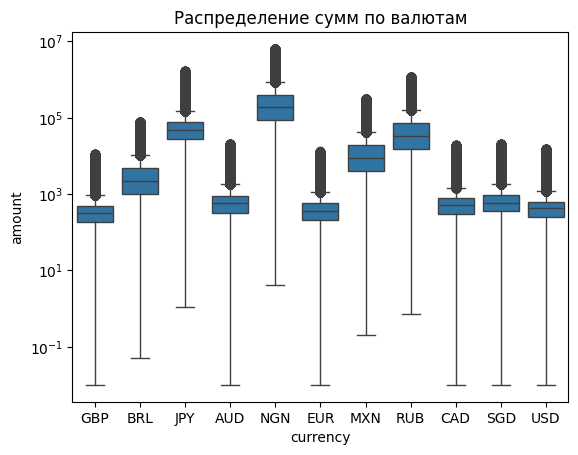

In [45]:
# Средняя доля мошенничества по валюте
currency_fraud = df.groupby('currency')['is_fraud'].mean().sort_values()
currency_fraud.plot(kind='barh', figsize=(8,6), title='Доля мошенничества по валютам')
plt.show()

# Распределение сумм по валюте
sns.boxplot(x='currency', y='amount', data=df)
plt.yscale('log')
plt.title('Распределение сумм по валютам')
plt.show()

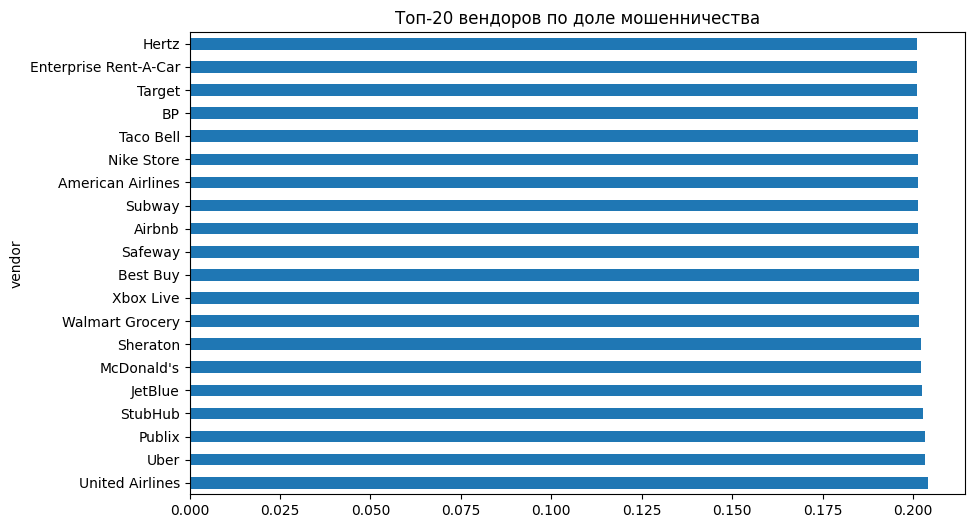

In [46]:
top_vendor_fraud = df.groupby('vendor')['is_fraud'].mean().sort_values(ascending=False).head(20)
top_vendor_fraud.plot(kind='barh', figsize=(10,6), title='Топ-20 вендоров по доле мошенничества')
plt.show()

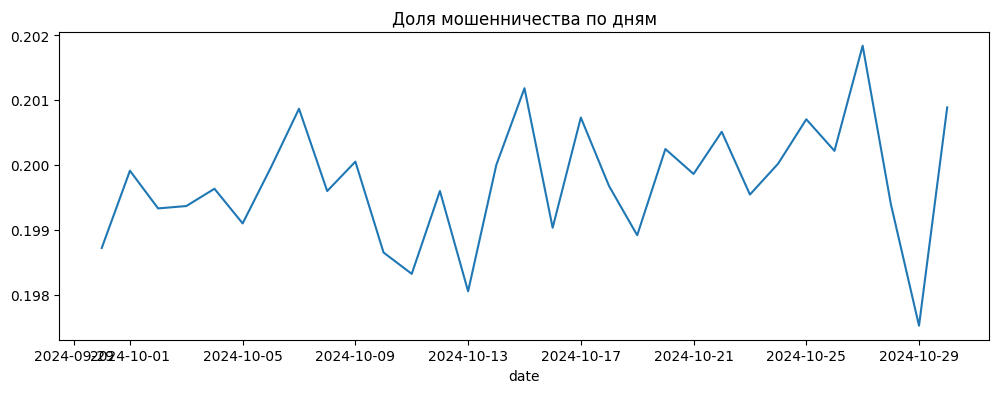

In [47]:
df['date'] = df['timestamp'].dt.date
daily_fraud = df.groupby('date')['is_fraud'].mean()
daily_fraud.plot(figsize=(12,4), title='Доля мошенничества по дням')
plt.show()

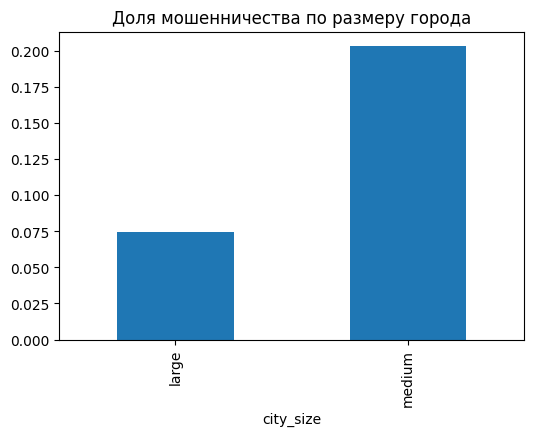

In [48]:
city_size_fraud = df.groupby('city_size')['is_fraud'].mean()
city_size_fraud.plot(kind='bar', figsize=(6,4), title='Доля мошенничества по размеру города')
plt.show()

In [51]:
 df.groupby('city_size')['is_fraud'].mean()

city_size
large     0.074585
medium    0.203150
Name: is_fraud, dtype: float64

In [50]:
# POS + карта не присутствует + зарубежная транзакция
combo_fraud = df.groupby(['is_card_present','is_outside_home_country','is_high_risk_vendor'])['is_fraud'].mean()
print(combo_fraud.sort_values(ascending=False))
#тут важно что при онлайн покупке за пределами своей страны высокий риск мошенничества

is_card_present  is_outside_home_country  is_high_risk_vendor
True             False                    False                  1.000000
                                          True                   1.000000
                 True                     False                  1.000000
                                          True                   1.000000
False            True                     False                  0.425871
                                          True                   0.425621
                 False                    False                  0.014192
                                          True                   0.014100
Name: is_fraud, dtype: float64


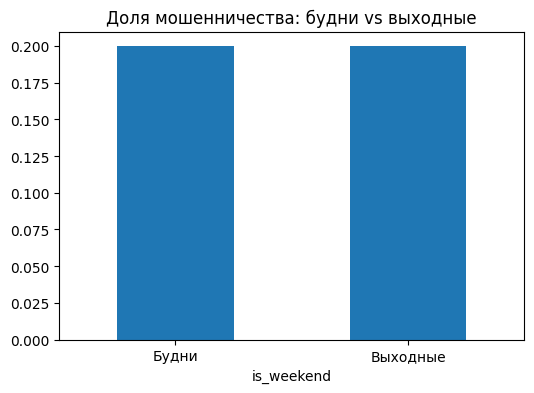

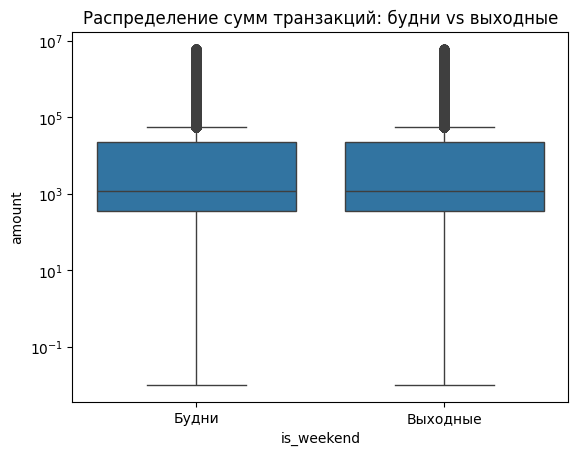

In [52]:
weekend_fraud = df.groupby('is_weekend')['is_fraud'].mean()
weekend_fraud.plot(kind='bar', figsize=(6,4), title='Доля мошенничества: будни vs выходные')
plt.xticks([0,1], ['Будни','Выходные'], rotation=0)
plt.show()

# Распределение сумм по выходным и будням
sns.boxplot(x='is_weekend', y='amount', data=df)
plt.yscale('log')
plt.xticks([0,1], ['Будни','Выходные'])
plt.title('Распределение сумм транзакций: будни vs выходные')
plt.show()

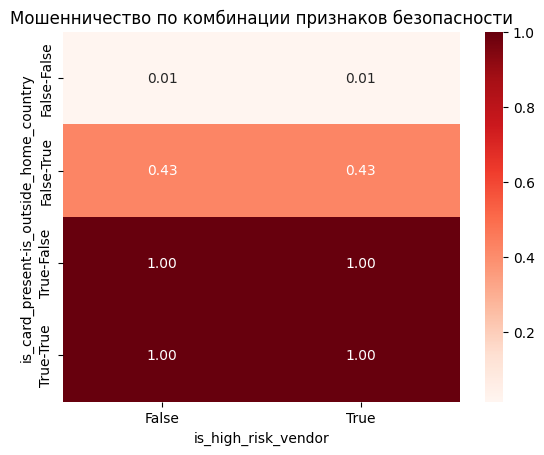

In [54]:
combo = df.groupby(['is_card_present','is_outside_home_country','is_high_risk_vendor'])['is_fraud'].mean().reset_index()
combo_pivot = combo.pivot_table(index=['is_card_present','is_outside_home_country'], columns='is_high_risk_vendor', values='is_fraud')
sns.heatmap(combo_pivot, annot=True, fmt=".2f", cmap="Reds")
plt.title('Мошенничество по комбинации признаков безопасности')
plt.show()

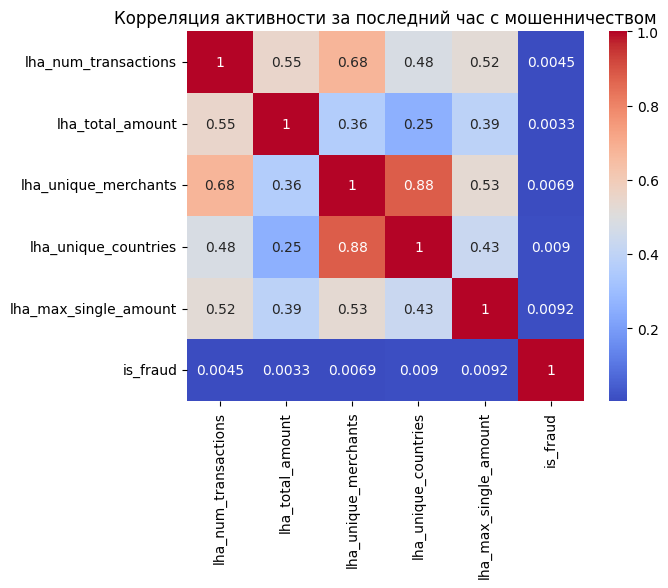

In [56]:
lha_cols = ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']
corr_data = df[[f'lha_{col}' for col in lha_cols] + ['is_fraud']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Корреляция активности за последний час с мошенничеством')
plt.show()

## Гипотеза: транзакции с высокой частотой за последний час чаще оказываются мошенническими

<Axes: >

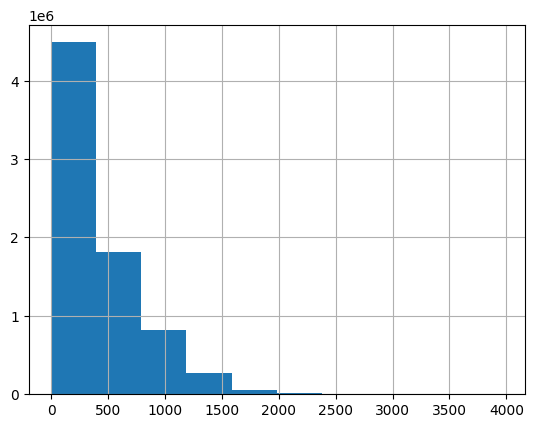

In [61]:
df['lha_num_transactions'].hist()

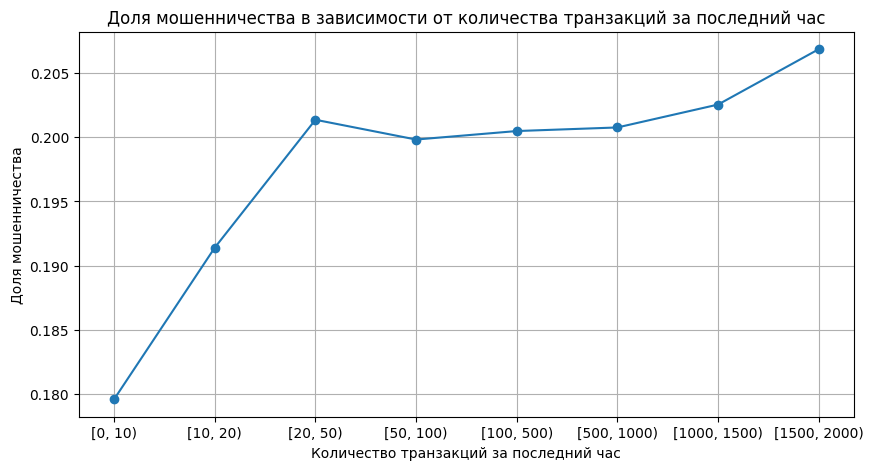

In [63]:
df['num_tx_bin'] = pd.cut(df['lha_num_transactions'], bins=[0,10,20,50,100,500,1000,1500,2000], right=False)
num_tx_fraud = df.groupby('num_tx_bin')['is_fraud'].mean()

plt.figure(figsize=(10,5))
num_tx_fraud.plot(marker='o')
plt.title('Доля мошенничества в зависимости от количества транзакций за последний час')
plt.xlabel('Количество транзакций за последний час')
plt.ylabel('Доля мошенничества')
plt.grid(True)
plt.show()

Ценность для организации: можно внедрить мониторинг активности в реальном времени — если клиент совершает много транзакций за короткое время, поднять флаг для проверки.

Гипотеза: если lha_unique_countries > 1 за последний час — подозрительно (клиент не физически может быстро сменить страны).

In [71]:
grp = df.groupby('lha_unique_countries')['is_fraud'].agg(['mean','count']).sort_index()
print(grp)

multi_country = df[df['lha_unique_countries'] > 1]
print("Доля мошенничества при lha_unique_countries>1:", multi_country['is_fraud'].mean(), "count:", len(multi_country))

                          mean    count
lha_unique_countries                   
0.0                   0.175938    32051
1.0                   0.175085    81372
2.0                   0.179534    96650
3.0                   0.184304   106118
4.0                   0.191259   116073
5.0                   0.197093   129812
6.0                   0.200095   150079
7.0                   0.200916   179020
8.0                   0.201341   221102
9.0                   0.200365   278632
10.0                  0.200778   390386
11.0                  0.200754   673611
12.0                  0.200877  5028860
Доля мошенничества при lha_unique_countries>1: 0.20010371294795914 count: 7370343


In [76]:
# Связка: несколько уникальных стран + операция вне своей страны
multi_country_outside = df[(df['lha_unique_countries'] > 1) & (df['is_outside_home_country'] == True)]
ratio = multi_country_outside['is_fraud'].mean()
count = len(multi_country_outside)

print("Доля мошенничества при >1 уникальной стране + вне своей страны:", ratio, "count:", count)

Доля мошенничества при >1 уникальной стране + вне своей страны: 0.5681049745700812 count: 2376728


In [75]:
df_sorted = df.sort_values(['customer_id', 'timestamp'])

df_sorted['device_use_order'] = df_sorted.groupby(['customer_id', 'device_fingerprint']).cumcount()

df_sorted['customer_tx_count'] = df_sorted.groupby('customer_id').cumcount()

# Новое устройство = используется впервые клиентом, и у клиента уже была хотя бы 1 предыдущая транзакция
df_sorted['is_new_device'] = (df_sorted['device_use_order'] == 0) & (df_sorted['customer_tx_count'] > 0)

# Пример: связка >1 уникальная страна + новое устройство
multi_country_new_device = df_sorted[(df_sorted['lha_unique_countries'] > 1) & (df_sorted['is_new_device'])]

ratio2 = multi_country_new_device['is_fraud'].mean()
count2 = len(multi_country_new_device)

print("Доля мошенничества при >1 уникальной стране + новом устройстве:", ratio2, "count:", count2)

Доля мошенничества при >1 уникальной стране + новом устройстве: 0.9952788014400129 count: 1479709


In [83]:
df_sorted = df.sort_values(['customer_id', 'timestamp'])

def get_suspicious_devices(group):
    seen = set()
    suspicious_flags = []
    for device in group['device_fingerprint']:
        if device not in seen:
            suspicious_flags.append(len(seen) >= 2)  # подозрительное, если до этого было >=2 устройства
            seen.add(device)
        else:
            suspicious_flags.append(False)
    return suspicious_flags

df_sorted['is_suspicious_new_device'] = df_sorted.groupby('customer_id', group_keys=False)\
                                                 .apply(get_suspicious_devices)

# >1 уникальная страна + подозрительное новое устройство
multi_country_susp_dev = df_sorted[(df_sorted['lha_unique_countries'] > 1) & df_sorted['is_suspicious_new_device']]

ratio = multi_country_susp_dev['is_fraud'].mean()
count = len(multi_country_susp_dev)

print("Доля мошенничества при >1 уникальной стране + подозрительном новом устройстве:", ratio, "count:", count)

Доля мошенничества при >1 уникальной стране + подозрительном новом устройстве: nan count: 0


Можно использовать эти комбинации как жёсткие правила для real-time блокировки или обязательной верификации

In [84]:
# 4. max_single_amount в ночные часы
night = df[df['hour'].isin([1,2,3,4])]
day = df[~df['hour'].isin([1,2,3,4])]

print("Night max_single_amount fraud rate (quantiles):")
print(night[['lha_max_single_amount','is_fraud']].describe())

# Сравним топ 5% по max_single_amount ночью
q95 = night['lha_max_single_amount'].quantile(0.95)
top_night = night[night['lha_max_single_amount'] >= q95]
print("Top 5% night max_single_amount -> fraud rate:", top_night['is_fraud'].mean(), "count:", len(top_night))

Night max_single_amount fraud rate (quantiles):
       lha_max_single_amount
count           1.122105e+06
mean            1.766863e+06
std             1.398645e+06
min             5.832916e-02
25%             8.303174e+05
50%             1.286188e+06
75%             2.373708e+06
max             6.253153e+06
Top 5% night max_single_amount -> fraud rate: 0.5915194849083115 count: 56223


Крупные транзакции в ночные часы сильно коррелируют с мошенничеством.

Сигнал «ночная крупная транзакция» можно использовать как триггер для проверки/верификации.

Это подтверждает гипотезу: мошенники чаще совершают крупные операции ночью, а обычные клиенты — реже.

Гипотеза: если транзакция проводится в валюте, нетипичной для указанной страны (по наиболее частой валюте этой страны), то риск выше.

In [87]:
import numpy as np

country_currency_mode = df.groupby('country')['currency'].agg(
    lambda x: x.mode().iat[0] if len(x.mode()) > 0 else np.nan
)
df['country_currency_mode'] = df['country'].map(country_currency_mode)

df['currency_mismatch'] = df['currency'] != df['country_currency_mode']

mismatch_grp = df.groupby('currency_mismatch')['is_fraud'].agg(['mean','count'])
print("Currency mismatch fraud stats:\n", mismatch_grp)

min_count = 1000
fraud_thresh = 0.5

cc = df.groupby(['country','currency'])['is_fraud'].agg(['mean','count']).reset_index()
top_cc = cc[(cc['count'] >= min_count) & (cc['mean'] >= fraud_thresh)].sort_values('mean', ascending=False).head(20)
print(top_cc)


Currency mismatch fraud stats:
                        mean    count
currency_mismatch                   
False              0.199728  7483766
Empty DataFrame
Columns: [country, currency, mean, count]
Index: []
